# Clustering
A small notebook for doing some data exploration and clustering on some dummy data to check the implementation of our functions work as expected.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

from kmeans import KMeans
from dbscan import dbscan
from helpers import calculate_average_radius, scatter, davies_bouldin_score, pca

# Plot some sample data
Lets just test our algorithms on some simple 2D data to make sure they behave as expected

/zhome/c9/c/156514/wiki-suggest/text-processing/helpers.py:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(points[:,0], points[:,1], c=colors, cmap="Set1")


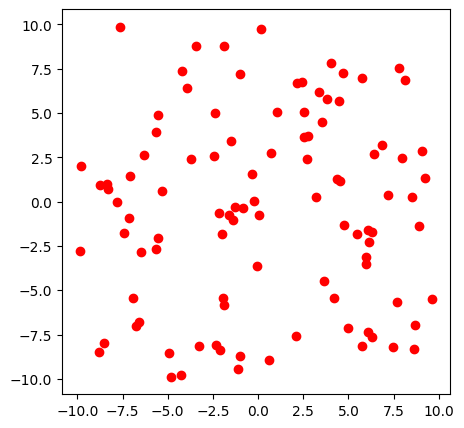

In [2]:
N = 100
points = np.random.uniform(-10, 10, (N, 2))

scatter(points)

### Select K based on average radius

In [3]:
K = 25

radius_scores = []
davies_scores = []

for k in trange(2, K + 1):
    kmeans = KMeans(n_clusters = k, n_iterations = 10)
    labels, centroids = kmeans.cluster(points)
    
    # We return the mean of the average radius per cluster - maybe it should be a mean or something else idk
    radius_scores.append(calculate_average_radius(points, labels, centroids).mean())
    davies_scores.append(davies_bouldin_score(points, labels, centroids))


100%|██████████| 24/24 [00:00<00:00, 35.83it/s]


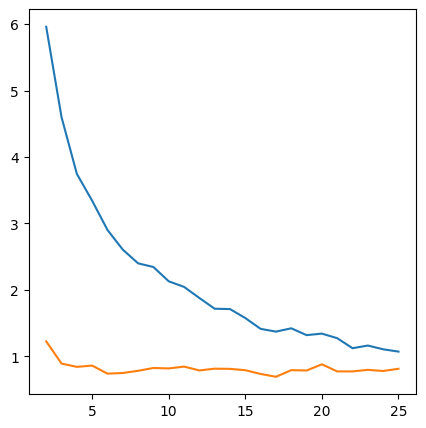

In [4]:
# Note davies-score sucks, or at least doesnt changes the the number of clusters
plt.figure(figsize=(5,5))
plt.plot(range(2, K + 1), radius_scores)
plt.plot(range(2, K + 1), davies_scores)
plt.show()

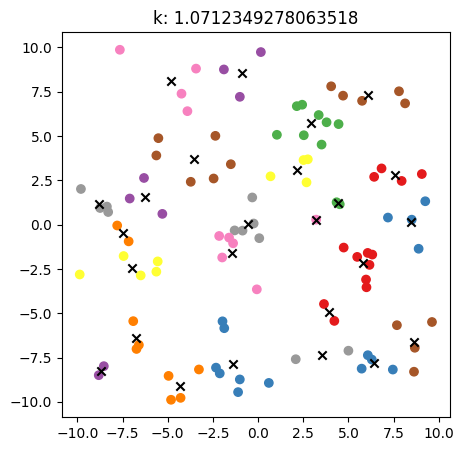

In [5]:
# Plot the last clustering for fun
scatter(points, centroids, labels, f"k: {radius_scores[-1]}")    

### K-means algorithm

In [6]:
N_CLUSTERS = 10
kmeans = KMeans(n_clusters = N_CLUSTERS, n_iterations = 10)
labels, centroids = kmeans.cluster(points)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


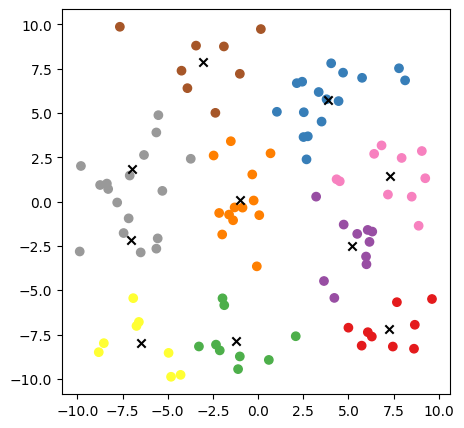

In [7]:
print(set(labels))
scatter(points, centroids=centroids,colors=labels)

### DBSCAN algorithm

In [8]:
labels = dbscan(points.tolist(), eps = 2, min_neighbours = 3, dist_function = "eucliean")

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -1}


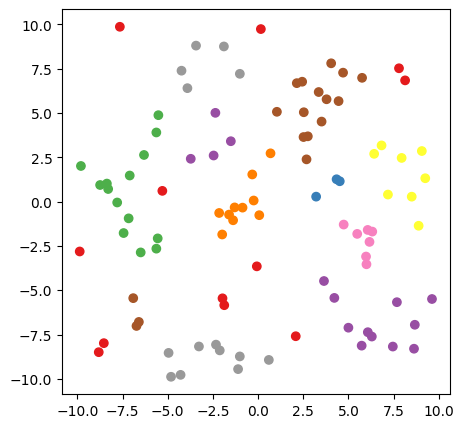

In [9]:
print(set(labels))
scatter(points, colors=labels)

# Using our data
Using the feature vectors of tf-idf or s-bert are high dimensional and not as easily visualized. Buts lets do some exploratory analysis

In [17]:
X_tfidf = np.loadtxt("/work3/s204163/wiki/tfidffeatures.csv", delimiter=",")
X_sbert = np.loadtxt("/work3/s204163/wiki/sbertfeatures.csv", delimiter=",")

print(X_tfidf.shape)
print(X_sbert.shape)

(36029, 200)
(36029, 384)


In [29]:
K = 50

from sklearn.cluster import KMeans

radius_scores = []
davies_scores = []

for k in trange(2, K + 1):
    labels, centroids = KMeans(n_clusters = k).cluster(X_tfidf)
    
    # We return the mean of the average radius per cluster - maybe it should be a mean or something else idk
    radius_scores.append(calculate_average_radius(X_tfidf, labels, centroids).mean())
    davies_scores.append(davies_bouldin_score(X_tfidf, labels, centroids))


100%|██████████| 49/49 [01:36<00:00,  1.98s/it]


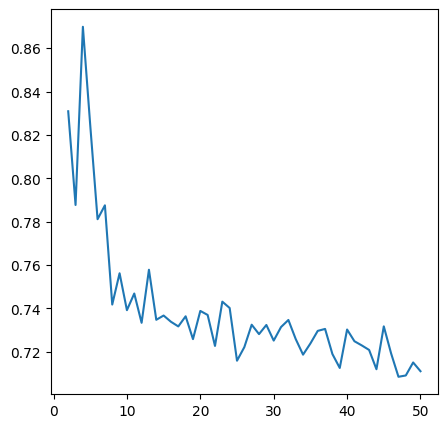

In [30]:
plt.figure(figsize=(5,5))
plt.plot(range(2, K + 1), radius_scores)
plt.show()

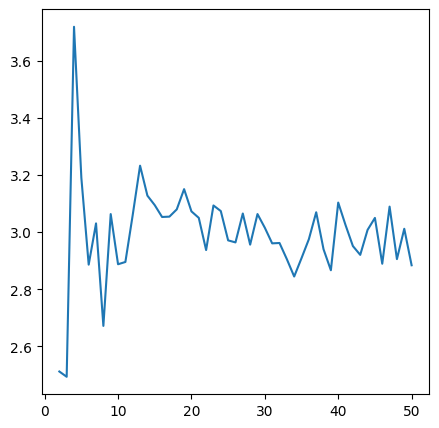

In [31]:
plt.figure(figsize=(5,5))
plt.plot(range(2, K + 1), davies_scores)
plt.show()

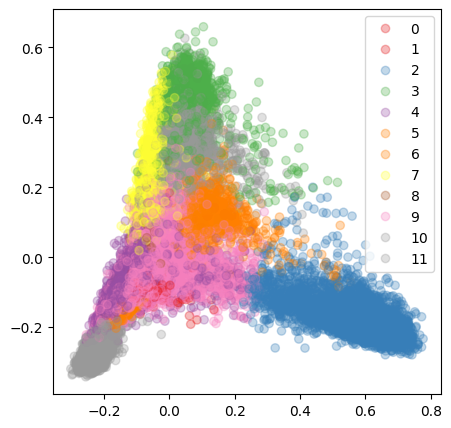

In [14]:
N_CLUSTERS = 12
labels, centroids = KMeans(n_clusters = N_CLUSTERS).cluster(X_tfidf)
pca(X_tfidf, labels=labels)

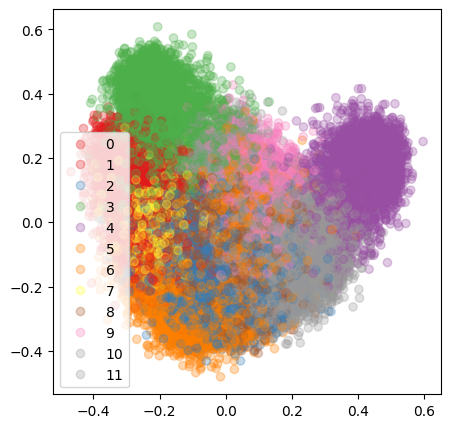

In [18]:
N_CLUSTERS = 12
labels, centroids = KMeans(n_clusters = N_CLUSTERS).cluster(X_sbert)
pca(X_sbert, labels=labels)